In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt



In [16]:
df = pd.read_csv('diabetes.csv')


# Data Preprocessing

Outcome
0.0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1.0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

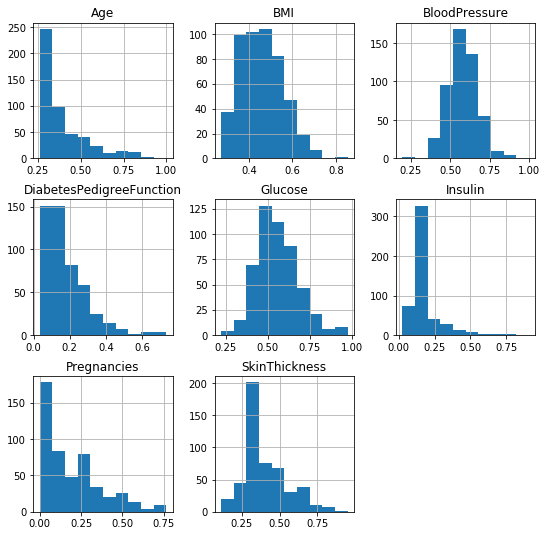

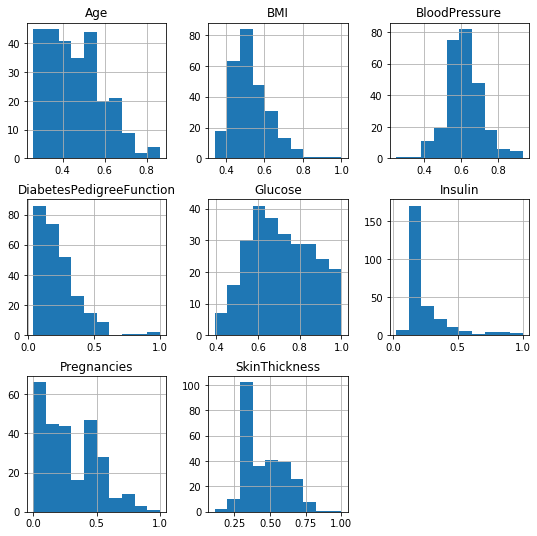

In [54]:
df.groupby('Outcome').hist(figsize=(9,9))

In [18]:
df.shape

(768, 9)

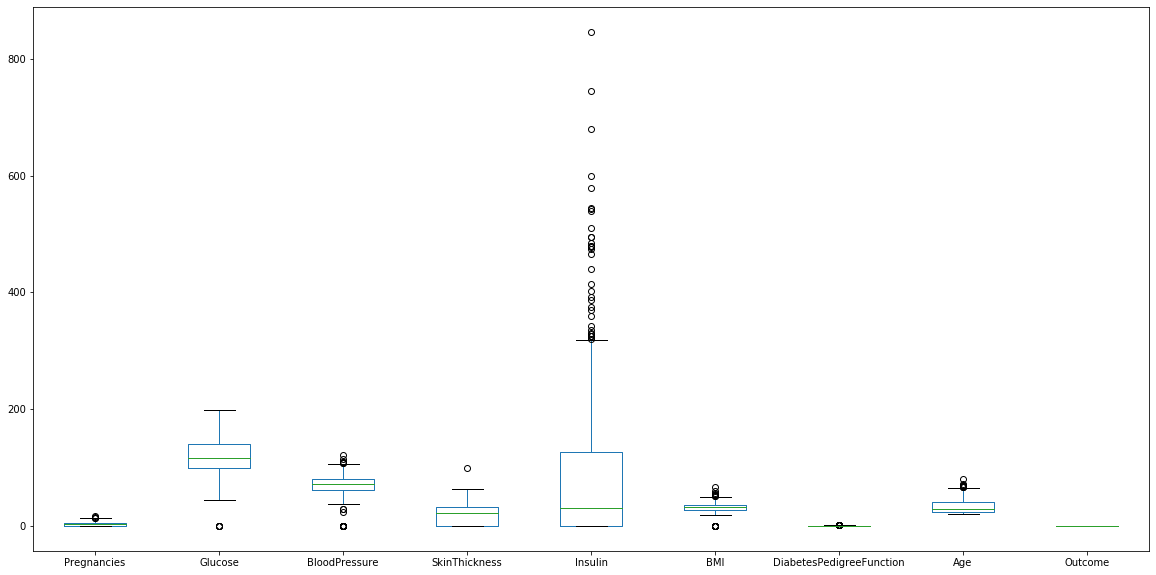

In [19]:
df.plot(kind = 'box', figsize = (20,10)) 
plt.show()

In [20]:
df = df[df['SkinThickness']<80]
df = df[df['Insulin']<= 600]

In [21]:
df.shape

(764, 9)

In [22]:
df.groupby('Outcome').size()

Outcome
0    498
1    266
dtype: int64

# Checking the null and invalid data

In [23]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
df[df.BloodPressure == 0].shape[0]

35

In [28]:
df[df.Insulin == 0].shape[0]

373

In [30]:
df[df.SkinThickness == 0].shape[0]

227

#removing zero by mean()

In [31]:
df.loc[df['Insulin'] == 0,'Insulin'] = df['Insulin'].mean()

In [33]:
df.loc[df['Glucose'] == 0,'Glucose'] = df['Glucose'].mean()
df.loc[df['BMI'] == 0,'BMI'] = df['BMI'].mean()
df.loc[df['BloodPressure'] == 0,'BloodPressure'] = df['BloodPressure'].mean()
df.loc[df['SkinThickness'] == 0,'SkinThickness'] = df['SkinThickness'].mean()

In [34]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,77.246073,33.60000,0.627,50,1
1,1,85.0,66.000000,29.000000,77.246073,26.60000,0.351,31,0
2,8,183.0,64.000000,20.390052,77.246073,23.30000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.10000,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.10000,2.288,33,1
5,5,116.0,74.000000,20.390052,77.246073,25.60000,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.00000,0.248,26,1
7,10,115.0,69.087696,20.390052,77.246073,35.30000,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.50000,0.158,53,1
9,8,125.0,96.000000,20.390052,77.246073,31.95877,0.232,54,1


# Finding corelation

In [35]:
crr = df.corr()

In [36]:
crr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.136118,0.210693,0.018948,-0.003789,0.025865,-0.034837,0.552249,0.224378
Glucose,0.136118,1.000000,0.224400,0.138440,0.382351,0.228243,0.122933,0.259829,0.496062
BloodPressure,0.210693,0.224400,1.000000,0.139179,0.010377,0.277700,0.001829,0.335090,0.167195
SkinThickness,0.018948,0.138440,0.139179,1.000000,0.270986,0.552574,0.152020,0.003126,0.170471
Insulin,-0.003789,0.382351,0.010377,0.270986,1.000000,0.184555,0.128520,0.025733,0.196290
BMI,0.025865,0.228243,0.277700,0.552574,0.184555,1.000000,0.153316,0.029503,0.318497
DiabetesPedigreeFunction,-0.034837,0.122933,0.001829,0.152020,0.128520,0.153316,1.000000,0.035411,0.183273
Age,0.552249,0.259829,0.335090,0.003126,0.025733,0.029503,0.035411,1.000000,0.231562
Outcome,0.224378,0.496062,0.167195,0.170471,0.196290,0.318497,0.183273,0.231562,1.000000


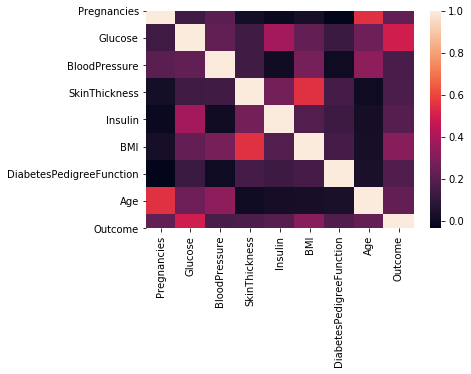

In [38]:
import seaborn as sns
crr
sns.heatmap(crr,xticklabels =crr.columns,yticklabels = crr.columns)

# NORMALIZATION

In [39]:
df = df/df.max()

In [40]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.555556,0.128743,0.500745,0.259091,0.617284,1.0
1,0.058824,0.427136,0.540984,0.460317,0.128743,0.396423,0.145041,0.382716,0.0
2,0.470588,0.919598,0.524590,0.323652,0.128743,0.347243,0.277686,0.395062,1.0
3,0.058824,0.447236,0.540984,0.365079,0.156667,0.418778,0.069008,0.259259,0.0
4,0.000000,0.688442,0.327869,0.555556,0.280000,0.642325,0.945455,0.407407,1.0


In [43]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)


In [50]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
#testing the model
from sklearn.metrics import accuracy_score

prediction =model.predict(x_test)
acc = accuracy_score(y_test,prediction)
acc

0.8235294117647058

In [ ]:
s